In [7]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
moltean_fruits_path = kagglehub.dataset_download('moltean/fruits')
hjstat1_fruits_360_classified_by_resnet_acc_99_99_path = kagglehub.notebook_output_download('hjstat1/fruits-360-classified-by-resnet-acc-99-99')

print('Data source import complete.')


ModuleNotFoundError: No module named 'kagglehub'

In [6]:
# import libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, callbacks

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1525e5544150>>
Traceback (most recent call last):
  File "/opt/bwhpc/common/jupyter/ai/2025-02-20/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 

KeyboardInterrupt



In [14]:
import os

train_root = r'/mnt/c/Users/Power/.cache/kagglehub/datasets/moltean/fruits/versions/45/fruits-360_100x100'
print(os.listdir(train_root))

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/Power/.cache/kagglehub/datasets/moltean/fruits/versions/45/fruits-360_100x100'

<a id="2"></a>
# <b> <span style='color:dimgray'>Step 2</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Load Data</span></b>

In [7]:
# load dataset
train_dir = '/mnt/c/Users/Power/.cache/kagglehub/datasets/moltean/fruits/versions/45/fruits-360_100x100/fruits-360/Training'
test_dir  = '/mnt/c/Users/Power/.cache/kagglehub/datasets/moltean/fruits/versions/45/fruits-360_100x100/fruits-360/Test'


# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(100, 100),
    seed=123,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(100, 100),
    seed=42,
)


Found 102790 files belonging to 201 classes.
Using 82232 files for training.


I0000 00:00:1749491032.245147    1746 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5557 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 102790 files belonging to 201 classes.
Using 20558 files for validation.


<a id="3"></a>
# <b> <span style='color:dimgray'>Step 3</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Name of Classes</span></b>

In [8]:
# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(train_dir))

# Print the class names and the number of classes
print("Class Names:", class_names)
num_classes = len(class_names)
print("Number of Classes:", num_classes)


Class Names: ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6', 'Apple 7', 'Apple 8', 'Apple 9', 'Apple Braeburn 1', 'Apple Core 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple Rotten 1', 'Apple hit 1', 'Apple worm 1', 'Apricot 1', 'Avocado 1', 'Avocado Black 1', 'Avocado Green 1', 'Avocado ripe 1', 'Banana 1', 'Banana 3', 'Banana 4', 'Banana Lady Finger 1', 'Banana Red 1', 'Beans 1', 'Beetroot 1', 'Blackberrie 1', 'Blackberrie 2', 'Blackberrie half rippen 1', 'Blackberrie not rippen 1', 'Blueberry 1', 'Cabbage red 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cactus fruit green 1', 'Cactus fruit red 1', 'Caju seed 1', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherimoya 1', 'Cherry 1', 'Cherr

<a id="4"></a>
# <b> <span style='color:dimgray'>Step 4</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Showing Images</span></b>

2025-06-09 19:44:34.689686: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


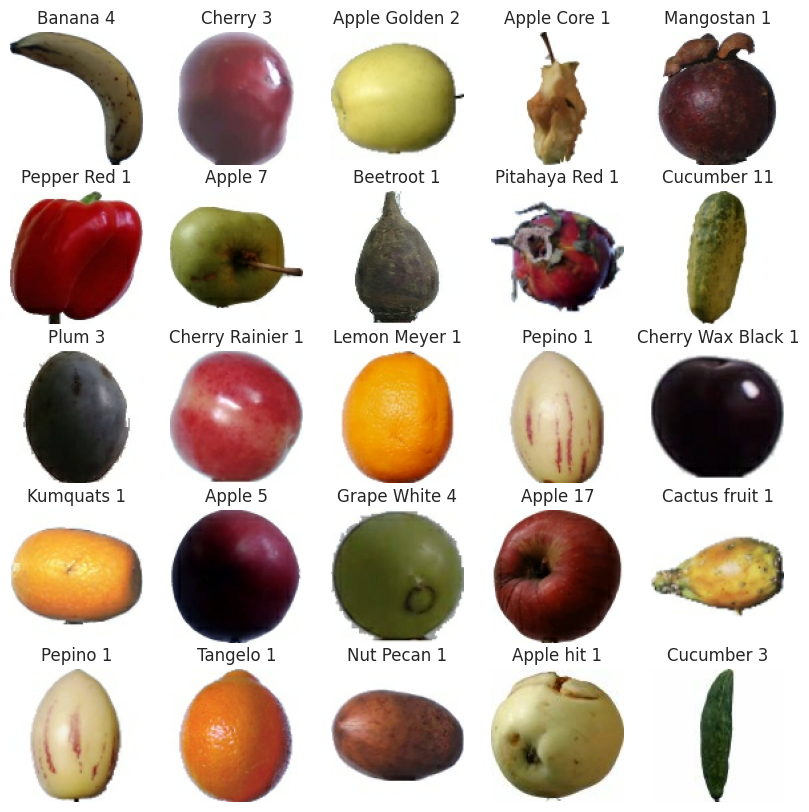

In [9]:
# Function to display images from a dataset
def show_images(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch from the dataset
        for i in range(25):  # Display 25 images
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Show images from training dataset
show_images(train_ds, class_names)
plt.show()


<a id="5"></a>
# <b> <span style='color:dimgray'>Step 5</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Configure Dataset For Performance</span></b>

**The variable AUTOTUNE in TensorFlow's tf.data.experimental module is used to dynamically tune the buffer size during data processing for optimal performance. In the given code, the training and validation datasets are cached and pre-fetched using AUTOTUNE as the buffer size, enabling faster data loading and processing during model training.**

In [10]:
# for faster training which takes less time and less memory for training
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

<a id="6"></a>
# <b> <span style='color:dimgray'>Step 6</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Data Augmentation</span></b>

**When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random, yet realistic, transformations to the training images, such as rotation and horizontal flipping. This helps expose the model to different aspects of the training data and reduce [overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit). You can learn more about data augmentation in this [tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation).**

In [11]:
# Augmentation for training dataset
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

<a id="7"></a>
# <b> <span style='color:dimgray'>Step 7</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>ResNEt Model For Transfer Learning</span></b>

**🔥 ResNet, short for Residual Network, is a popular model for transfer learning in deep learning. Its architecture, with skip connections and residual blocks, allows for efficient training of deep neural networks, making it highly effective in tasks such as image classification and object detection. 🚀**

In [12]:
# Using resNET model of transfer learning for training
base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(100, 100, 3))

In [13]:
preprocess_input = tf.keras.applications.resnet.preprocess_input
base_model.trainable = False

In [14]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes)

<a id="8"></a>
# <b> <span style='color:dimgray'>Step 8</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Build Model</span></b>

In [15]:
inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [17]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 106, 106,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 50, 50,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 50, 50,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 50, 50,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 52, 52,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 25, 25,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 25, 25,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 25, 25,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 25, 25,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 25, 25,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 25, 25,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 25, 25,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 25, 25,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 25, 25,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

<a id="9"></a>
# <b> <span style='color:dimgray'>Step 9</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Train Model</span></b>

In [ ]:

# Define EarlyStopping callback
early_stopping = callbacks.EarlyStopping(patience=3)

# Train the model with early stopping
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[early_stopping]  # Add the EarlyStopping callback to the training process
)

Epoch 1/10


2025-06-09 19:45:08.236833: W external/local_xla/xla/stream_executor/integrations/stream_executor_allocator.cc:50] could not allocate pinned host memory of size: 1073741824
2025-06-09 19:45:08.372211: W external/local_xla/xla/stream_executor/integrations/stream_executor_allocator.cc:50] could not allocate pinned host memory of size: 966367744
2025-06-09 19:45:08.471433: W external/local_xla/xla/stream_executor/integrations/stream_executor_allocator.cc:50] could not allocate pinned host memory of size: 869731072
2025-06-09 19:45:08.624467: W external/local_xla/xla/stream_executor/integrations/stream_executor_allocator.cc:50] could not allocate pinned host memory of size: 782758144
2025-06-09 19:45:08.722512: W external/local_xla/xla/stream_executor/integrations/stream_executor_allocator.cc:50] could not allocate pinned host memory of size: 704482304
2025-06-09 19:45:08.818240: W external/local_xla/xla/stream_executor/integrations/stream_executor_allocator.cc:50] could not allocate pinne

In [1]:
import tensorflow as tf
print(tf.__version__)
print(tf.sysconfig.get_build_info())
print(tf.config.list_physical_devices('GPU'))

2025-06-09 19:14:17.719953: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-09 19:14:17.934637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749489258.029043     966 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749489258.056700     966 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749489258.223222     966 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

2.19.0
OrderedDict([('cpu_compiler', '/usr/lib/llvm-18/bin/clang'), ('cuda_compute_capabilities', ['sm_60', 'sm_70', 'sm_80', 'sm_89', 'compute_90']), ('cuda_version', '12.5.1'), ('cudnn_version', '9'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', False)])
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
import sys
print(sys.executable)

/usr/bin/python3


In [2]:
print("hello2")

hello2


<a id="10"></a>
# <b> <span style='color:dimgray'>Step 10</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Accuracy Plot</span></b>

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

<a id="11"></a>
# <b> <span style='color:dimgray'>Step 11</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Loss Plot</span></b>

In [6]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

<a id="12"></a>
# <b> <span style='color:dimgray'>Step 12</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Predict Images</span></b>

In [ ]:
def predict(model, img):
    img_array = tf.keras.utils.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 0)
    return predicted_class, confidence

In [ ]:
import matplotlib.pyplot as plt

# Assuming val_ds is your validation dataset
plt.figure(figsize=(15, 15))
for images, labels in val_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)  # Adjust the subplot layout as per your preference
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis('off')

plt.tight_layout()
plt.show()
